# Census Dataset Study

## Dataset Imbalance

- Load dataset
- Try fitting Logistic Regression? What do you observe?
- Transform all categorical variables into integers. Otherwise, many ML algorithms cannot deal with them.
- What out for the non-categorical variables.
- Also, encode the target.
- What do you observe for the target?

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split


# fetch dataset
census_income_kdd = fetch_ucirepo(id=117)

# data (as pandas dataframes)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets

In [3]:
import pandas as pd
df_features=pd.DataFrame(X)
df_targets=pd.DataFrame(y)

 doing the target encoding

In [4]:
# encoding the target values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df_encoded_targets = encoder.fit_transform(df_targets['income'])

df_targets.head()
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the class mapping
print(class_mapping)

{' 50000+.': 0, '-50000': 1}


In [5]:
count_A=df_encoded_targets.sum()
count_B= len(df_encoded_targets)-count_A
print(f'number of people which are in class >50k: {count_B}')
print(f'number of people which are in class <=50k: {count_A}')

number of people which are in class >50k: 12382
number of people which are in class <=50k: 187141


doing th feautre encoding

In [6]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
o_encoder= OrdinalEncoder()
l_endcoder= LabelEncoder()
df_features=df_features.fillna(-1)
df_features=df_features.astype(str)
df_encoded_features= o_encoder.fit_transform(df_features)

df_encoded_features = pd.DataFrame(df_encoded_features)
df_encoded_targets = pd.DataFrame(df_encoded_targets)

splitting the data first to avoid data leakage

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_encoded_features, df_encoded_targets, test_size=0.2, random_state=42)

In [8]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ADASYN

In [9]:
adasyn= ADASYN()
smote=SMOTE()
rs=RandomOverSampler()
df_adasyn_features, df_adasyn_targets=adasyn.fit_resample(X_train, y_train)
df_smote_features, df_smote_targets=smote.fit_resample(X_train, y_train)
df_rs_features, df_rs_targets=rs.fit_resample(X_train, y_train)

In [10]:
count_A=df_adasyn_targets.sum()
count_B= len(df_adasyn_targets)-count_A
print(f'ADASYN number of people which are in class +50k: {count_B.item()}')
print(f'ADASYN number of people which are in class -=50k: {count_A.item()}')

ADASYN number of people which are in class +50k: 148431
ADASYN number of people which are in class -=50k: 149598


In [11]:
count_A=df_smote_targets.sum()
count_B= len(df_smote_targets)-count_A
print(f'SMOTE number of people which are in class +50k: {count_B.item()}')
print(f'SMOTE number of people which are in class -=50k: {count_A.item()}')

SMOTE number of people which are in class +50k: 149598
SMOTE number of people which are in class -=50k: 149598


In [12]:
count_A=df_rs_targets.sum()
count_B= len(df_rs_targets)-count_A
print(f'RANDOMSAMPLER number of people which are in class +50k: {count_B.item()}')
print(f'RANDOMSAMPLER number of people which are in class -=50k: {count_A.item()}')

RANDOMSAMPLER number of people which are in class +50k: 149598
RANDOMSAMPLER number of people which are in class -=50k: 149598


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
model_A= LogisticRegression()
model_S=LogisticRegression()
model_RS=LogisticRegression()
model_A.fit(df_adasyn_features,df_adasyn_targets)
model_S.fit(df_smote_features,df_smote_targets)
model_RS.fit(df_rs_features,df_rs_targets)

adasyn_preds= model_A.predict(X_test)
smote_preds=model_S.predict(X_test)
rs_preds=model_RS.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score
adasyn_acc= balanced_accuracy_score(y_test,adasyn_preds)
matrix_A=confusion_matrix(y_test, adasyn_preds)
print(f'The balanced accuracy score score of the model: {adasyn_acc}')
matrix_S=confusion_matrix(y_test, smote_preds)
S_acc= balanced_accuracy_score(y_test,smote_preds)
print(f'The balanced accuracy score score of the model: {S_acc}')
matrix_RS=confusion_matrix(y_test, rs_preds)
RS_acc= balanced_accuracy_score(y_test,rs_preds)
print(f'The balanced accuracy score score of the model: {RS_acc}')

The balanced accuracy score score of the model: 0.8002127754924564
The balanced accuracy score score of the model: 0.7996457542119978
The balanced accuracy score score of the model: 0.7967950066988385


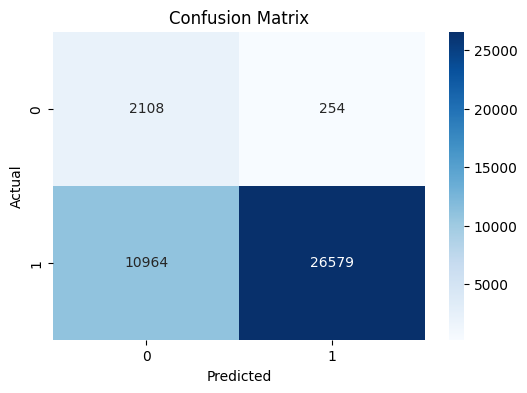

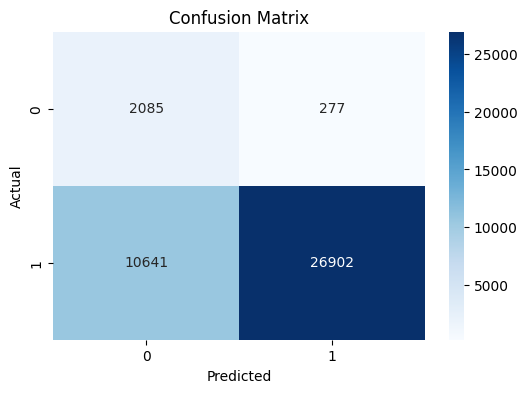

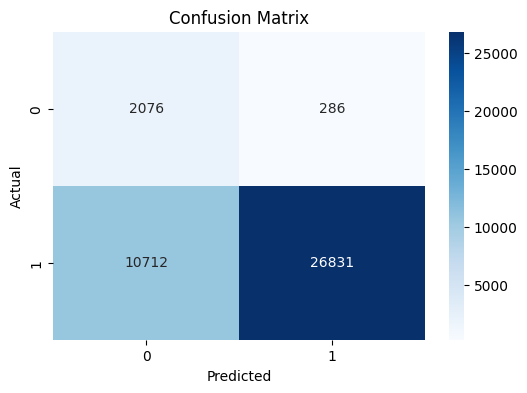

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
matrix_list=[matrix_A, matrix_S,matrix_RS]
for matrix in matrix_list:
  plt.figure(figsize=(6, 4))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(2)
model_KNN.fit(df_adasyn_features,df_adasyn_targets)
knn_preds=model_KNN.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
knn_acc= balanced_accuracy_score(y_test,knn_preds)
matrix_knn=confusion_matrix(y_test,knn_preds)
print(f'The balanced accuracy score score of the model: {knn_acc}')

The balanced accuracy score score of the model: 0.6886650752804298


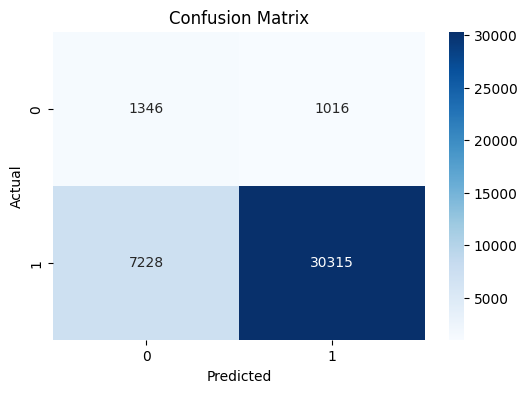

In [21]:

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Case Study Balancing

### Oversampling
Links:
- https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py
- https://imbalanced-learn.org/stable/common_pitfalls.html

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [ ]:
# unbalanced

In [ ]:
# WITH BALANCING

In [23]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Fetch the dataset
census_income_kdd = fetch_ucirepo(id=117)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets

# Check for non-numeric columns
print(X.dtypes)

# Preprocess categorical columns: Impute missing values and encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Create preprocessing pipeline for categorical columns
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   # One-Hot encode categorical columns
])

# Create preprocessing pipeline for numeric columns
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),           # Handle missing values
    ('scaler', StandardScaler())                           # Scale numeric data
])

# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Apply the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model with class weights balanced
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


AAGE           int64
ACLSWKR       object
ADTINK         int64
ADTOCC         int64
AHGA          object
AHSCOL        object
AMARITL       object
AMJIND        object
AMJOCC        object
ARACE         object
AREORGN       object
ASEX          object
AUNMEM        object
AUNTYPE       object
AWKSTAT       object
CAPGAIN        int64
GAPLOSS        int64
DIVVAL         int64
FILESTAT      object
GRINREG       object
GRINST        object
HHDFMX        object
HHDREL        object
MARSUPWRT    float64
MIGMTR1       object
MIGMTR3       object
MIGMTR4       object
MIGSAME       object
MIGSUN        object
NOEMP          int64
PARENT        object
PEFNTVTY      object
PEMNTVTY      object
PENATVTY      object
PRCITSHP      object
SEOTR          int64
VETQVA        object
VETYN          int64
WKSWORK        int64
AHRSPAY        int64
year           int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[34086  3289]
 [ 5354 32128]]
